<a href="https://colab.research.google.com/github/martinescobars/Quantopian-Challenges/blob/main/challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synthesized closing prices for assets:


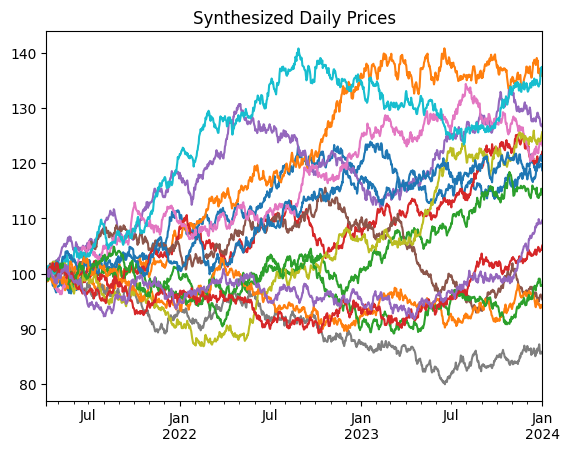


Cumulative returns and annulized sharpe of your alpha:


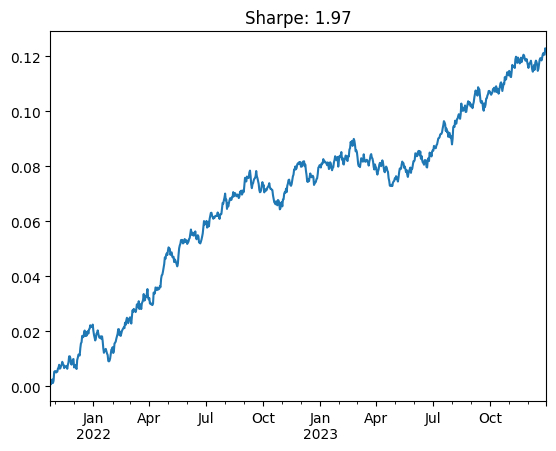

{'success': True, 'message': 'Congratulations, you have solved Challenge 4!'}

In [1]:
###############################################################################
# Challenge Description
# ---------------------
# Following the 101 Alphas paper, you are creating alpha No. 37:
#    (rank(correlation(delay((open - close), 1), close, 200)) + rank((open - close)))
#
# The alpha is a set of daily weights for all the instruments in the trading
# universe. Your function will receive time-series N instrument prices with d days
# of data. Implement the above formula and applie it to calculate the weights.
#
#
# Assumptions:
# ---------------------
# - There are 256 trading days per year.
#
# References
# ---------------------
# - 101 Formulaic Alphas: https://arxiv.org/pdf/1601.00991
# - Dr. Tom Starke's preso of the paper: https://community.quantopian.com/c/live-event-calendar/101-alphas-with-dr-tom-starke
#
#
# Instructions
# ---------------------
#  1. set YOUR_EMAIL to a valid email address
#  2. Implement the alpha method to solve the puzzle.
#  3. Run this cell to submit and check your answer. Check out the plots!
###############################################################################

YOUR_EMAIL = "YOUR EMAIL" # <<<<< Be sure to set your email address.

import numpy as np
import pandas as pd

def rank(df):
    """Return the cross-sectional percentile rank

     Args:
         :param df: tickers in columns, sorted dates in rows.

     Returns:
         pd.DataFrame: the ranked values
     """
    return df.rank(axis=1, pct=True)

def ts_corr(x, y, window=10):
    """
    Wrapper function to estimate rolling correlations.
    :param x, y: pandas DataFrames.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return x.rolling(window).corr(y)

def ts_delay(df: pd.DataFrame, t: int = 1) -> pd.DataFrame:
    """Return the lagged values t periods ago.

    Args:
        :param df: tickers in columns, sorted dates in rows.
        :param t: lag

    Returns:
        pd.DataFrame: the lagged values
    """
    return df.shift(t)

def alpha(Open, Close): # <<<<< implement the alpha in this method
  """
  parameters:
  - `Open` -- Daily opening prices for all securities (synthetic).
  - `Close` -- Daily closing prices for all securities (synthetic).

  (rank(correlation(delay((open - close), 1), close, 200)) + rank((open - close)))

  returns:
  a DataFrame with the same dimensions as Open and Close
  """


  # alpha is a dataframe with the same dimensions as open and close
  # each entry in the dataframe represents the weight for that stock
  # on that day.

  #return Close - Open

  return (rank(ts_corr(ts_delay(Open.sub(Close), 1), Close, 200))
            .add(rank(Open.sub(Close))))


###############################################################################
# Code below checks your answer.
##############################################################################

## Here we share the method for calculating the returns/sharpe of the alpha.
def performance(Open, Close, alpha):
  daily_returns = (alpha*Close.pct_change().shift(-1))
  annualized_sharpe = daily_returns.mean(axis=1).mean()/daily_returns.mean(axis=1).std()*16
  return daily_returns, annualized_sharpe

def mk_data(seed):
  np.random.seed(seed)
  r = np.random.randn(2000,15)*0.003+0.00007
  price = np.cumprod(1+r,axis=0)*100
  op = price[0:-1:2,:]
  cl = price[1::2,:]
  dates = pd.date_range(periods=op.shape[0],end='2024-1-1',freq='1D')
  Open = pd.DataFrame(op,index=dates)
  Close = pd.DataFrame(cl,index=dates)
  return Open,Close

import pylab as plt
def run_alpha(seed):
  Open, Close = mk_data(seed)
  print("Synthesized closing prices for assets:")
  Close.plot()
  plt.title("Synthesized Daily Prices")
  plt.legend().set_visible(False)
  plt.show()
  print("\nCumulative returns and annulized sharpe of your alpha:")
  rets, sharpe = performance(Open, Close, alpha(Open, Close))
  rets.mean(axis=1).dropna().cumsum().plot()
  plt.title(f'Sharpe: {sharpe:.2f}')
  plt.show()
  print("\n")
  return sharpe

BASE_URL="https://muse.quantopian.com/api/v1/challenges/4"

import requests
def submit_solution():
  params_r = requests.get(f"{BASE_URL}/params")
  if params_r.status_code != 200:
    return params_r.json()

  params = params_r.json()
  result = run_alpha(**params)
  payload={
      "submission":{
          'email':YOUR_EMAIL,
          'params':params,
          'result':result
      }
  }
  challenge_result = requests.post(
        f"{BASE_URL}/solution",
        json=payload
      )

  return challenge_result.json()

submit_solution()